In [1]:
  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')


In [3]:
X = df.iloc[:, [3, 4]].values


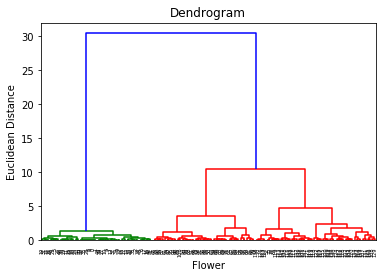

In [4]:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendrogram')
plt.xlabel('Flower')
plt.ylabel('Euclidean Distance')
plt.show()


In [5]:

# Here we get 3 clusters by dendrogram
# Height in dendrogram at which two clusters are merged represents
#distance between two clusters in data space

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [6]:
# The decision of merging two clusters is taken on the basis of closeness of these clusters.
# * Euclidean distance: ||a-b||^2 = √(Σ(ai-bi))
# * Squared Euclidean distance: ||a-b||^2 = Σ((ai-bi)^2)
# * Manhattan distance: ||a-b|| = Σ|ai-bi|
# * Maximum distance:||a-b||INFINITY = maxi|ai-bi|


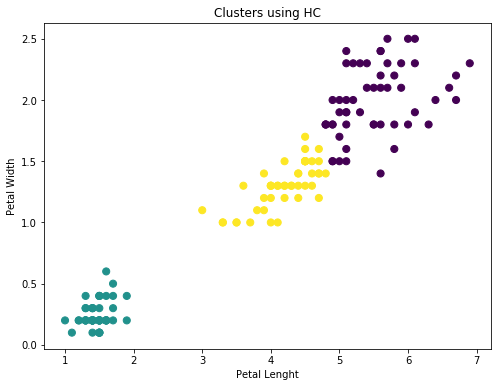

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

plt.title('Clusters using HC')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

columns = ['Species']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

Text(0.5, 0, 'Petal Lenght')

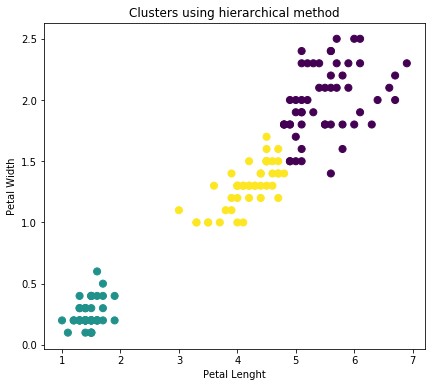

In [9]:
df = encoder(df)

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title('Clusters using hierarchical method')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')

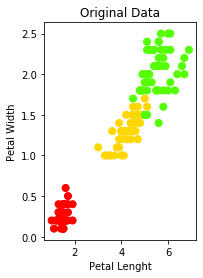

In [10]:
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=df.iloc[:,5].values, s=50, cmap='prism')
plt.title('Original Data')
plt.ylabel('Petal Width')
plt.xlabel('Petal Lenght')
plt.show()